Osmo-independent

v4 -> bug (no k1, k2)

v5 -> fixed

v7 -> ran longer (500 generations) == got flat line for WT, not sure what that was about

v9 -> bug fix (wrong placement of k1, and k2), still didn't perform

# Import packages and set settings

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../python_modules')
import plotting_Sho1_v2 as plotting
import model_supp_Sho1 as model_supp
import Sho1models_ss as model

In [2]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import collections
import h5py

In [4]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Model

## Model Variables (Constants)

In [3]:
dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)
Sho1_on = 1
Sln1_on = 1

# Protein concentrations (mM) #2
Sln1_tot = model_supp.molarity_conversion(1176)
Sho1_tot = model_supp.molarity_conversion(1534)
Hog1_tot = model_supp.molarity_conversion(8225)
wt_const = [Sln1_tot, Sho1_tot, Hog1_tot, 0, Sln1_on, Sho1_on] #mM
sho1_const = [Sln1_tot, Sho1_tot, Hog1_tot, 0, 0, Sho1_on] #mM
sln1_const = [Sln1_tot, Sho1_tot, Hog1_tot, 0, Sln1_on, 0] #mM


# initial values
Sln1 = 0
Sho1 = 0
Hog1A = 0.01 * Hog1_tot
Glycerol = 0.0001
inits = [Sln1, Sho1, Hog1A, Glycerol]

# doses
doses = [150, 350, 550]

# Parameter ranges
number_of_params = 17
minimums = [1, -4, -4, -4, -4, -4,
           -4, -4, -4, -4, -4, -4,
           -4, -4, -4, -4, -4]
    
maximums = [2, 4, 4, 4, 4, 4,
            4, 4, 4, 4, 4, 4,
            4, 4, 4, 4, 4]

labelnames = ['$baseosmo$', '$k1$', '$K1$', '$k2$', '$K2$', 
              '$k3$', '$K3$', '$k4$', '$K4$', '$k5$', '$K5$','$k6$', '$K6$',
              '$k7$', '$K7$', '$k8$',  '$k10$']

diff = np.asarray(maximums)-np.asarray(minimums) #for plotting
dims = (diff, minimums) #for plotting

# Load experimental data

In [5]:
exp_data, exp_time = model_supp.get_data(input='Sho1')

wt_data, sln1_data, sho1_data = exp_data
wt_time, sln1_time, sho1_time = exp_time 

# Load simulation data

In [6]:
model_fxns = model.Model(model.M9)

In [7]:
folder = '../sim_data/200513_Model1Sho1ss_v011/'
all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 959
Best last gen MSE: 1658.894357534913
Mean last gen MSEs of top 5%: 7426.968783162429


In [8]:
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)

# Check EA results

No handles with labels found to put in legend.


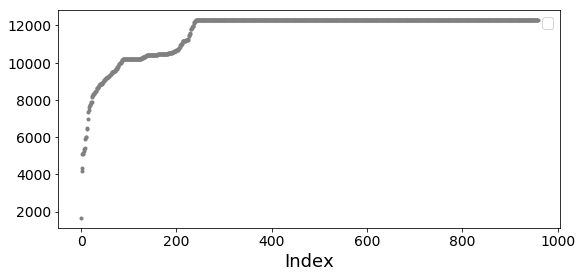

In [9]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


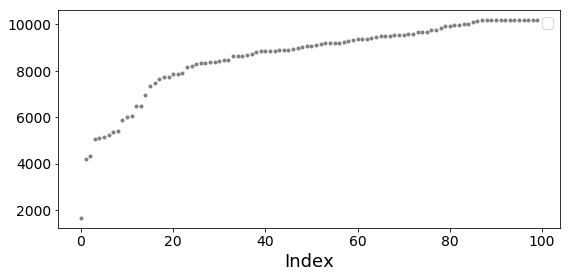

In [10]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

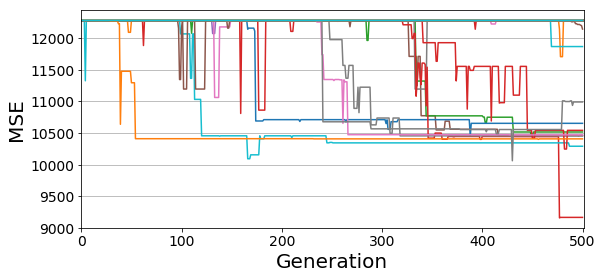

In [11]:
plotting.plt_mses_gen(len(all_mses[0]), all_mses, 100)

Dose: 150 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

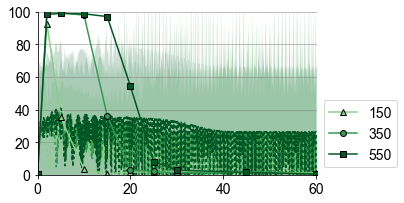

In [12]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:10], wt_const, inits, doses, time, param='phospho',
                        exp_data=wt_data, exp_time=wt_time, ss=True, Sln1=False, Sho1=False, ci='sd',
                        save_fig='')

ValueError: not enough values to unpack (expected 7, got 6)

<Figure size 720x576 with 0 Axes>

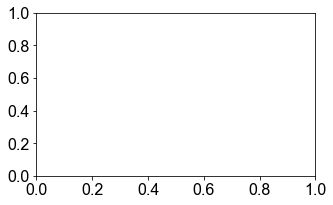

In [13]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:2], sln1_const, inits, doses, time, param='phospho',
                        exp_data=sln1_data, exp_time=sln1_time, ss=True, Sln1=True, Sho1=False, ci='sd',
                        save_fig='')

ValueError: not enough values to unpack (expected 7, got 6)

<Figure size 720x576 with 0 Axes>

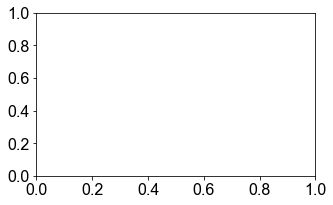

In [16]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:3], sho1_const, inits, doses, time, param='phospho',
                        exp_data=sho1_data, exp_time=sho1_time, ss=True, Sln1=False, Sho1=True, ci='sd',
                        save_fig='')

<Figure size 720x576 with 0 Axes>

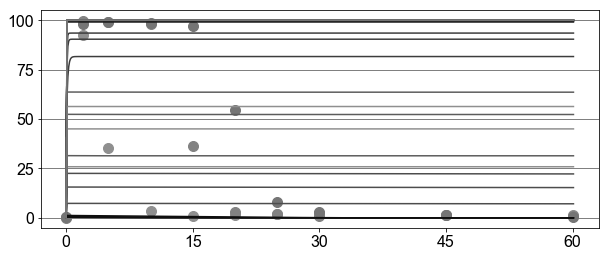

In [14]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, wt_const, inits,  doses, time, 'sln1', mapk_data=wt_data, mapk_t100a_data=None, mapk_time=wt_time,ss=True, Sln1=False, Sho1=False)

<Figure size 720x576 with 0 Axes>

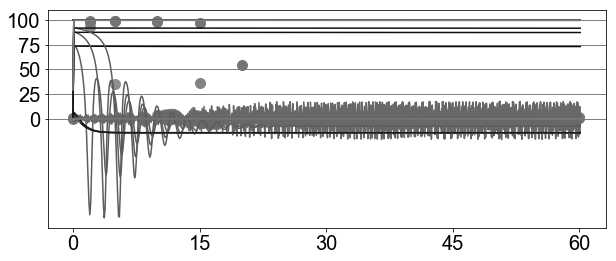

In [15]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, wt_const, inits,  doses, time, 'sho1', mapk_data=wt_data, mapk_t100a_data=None, mapk_time=wt_time,ss=True, Sln1=False, Sho1=False)

<Figure size 720x576 with 0 Axes>

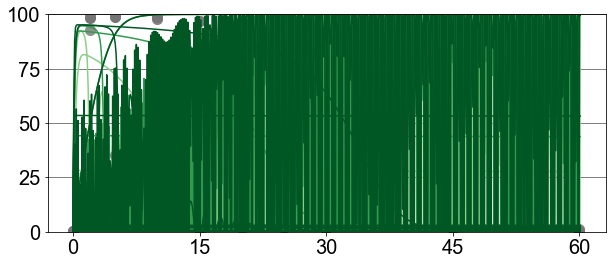

In [16]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, wt_const, inits,  doses, time, 'phospho', mapk_data=wt_data, mapk_t100a_data=None, mapk_time=wt_time,ss=True, Sln1=False, Sho1=False)

ValueError: not enough values to unpack (expected 7, got 6)

<Figure size 720x576 with 0 Axes>

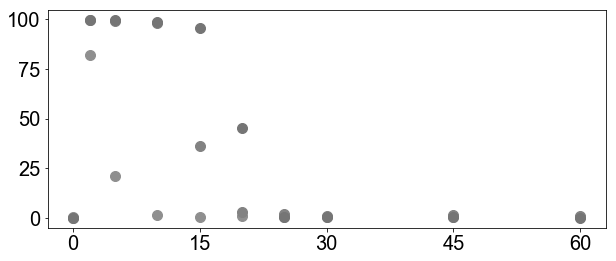

In [17]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 100, sln1_const, inits,  doses, time, 'phospho', mapk_data=sln1_data, mapk_t100a_data=None, mapk_time=sln1_time,ss=True, Sln1=True, Sho1=False)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 720x576 with 0 Axes>

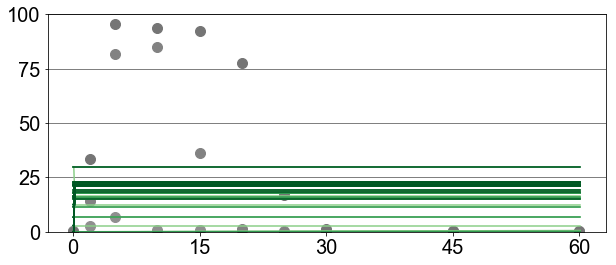

In [27]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 100, sho1_const, inits,  doses, time, 'phospho', mapk_data=sho1_data, mapk_t100a_data=None, mapk_time=sho1_time,ss=True, Sln1=False, Sho1=True)

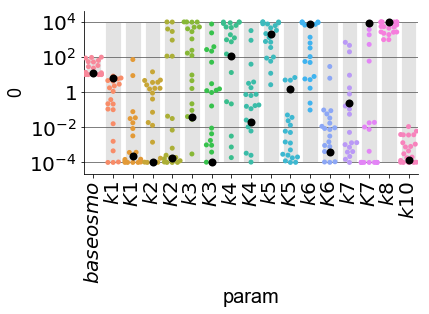

In [18]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

num_plt = 20
df_plt = sorted_thetas_EA[:num_plt]
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M19', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param


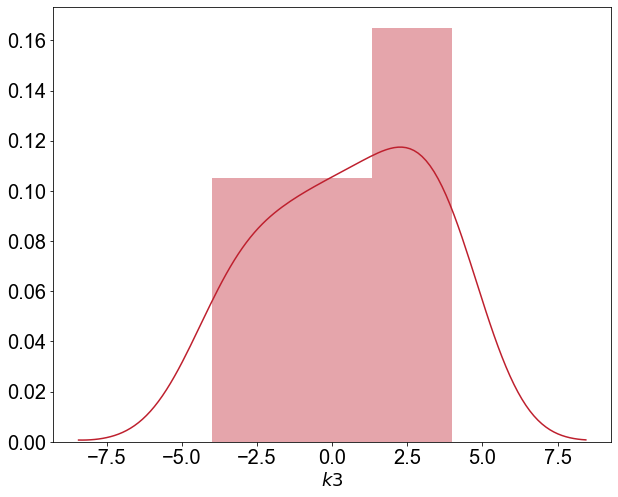

In [26]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[3]]))

# Check ABC - SMC

In [91]:
base_folder = 'C:/Users/sksuzuki/Documents/GitHub/HOG_encoding_feedbacks/python_modules/ABC_SMC/200121_M3c_ea_abc_smc/'

ea = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0000.hdf5', 'r')

In [93]:
list(ea.keys())

['mses', 'thetas']

In [94]:
ea_thetas = ea['thetas']
ea_mses = ea['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\o

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

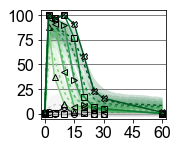

In [96]:
plotting.plt_param_cis(model_fxns, ea_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [97]:
e1 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0001.hdf5', 'r')

In [98]:
e1_thetas = e1['thetas']
e1_mses = e1['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

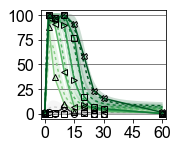

In [99]:
plotting.plt_param_cis(M2c_fxns, e1_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [100]:
e4 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0004.hdf5', 'r')

e4_thetas = e4['thetas']
e4_mses = e4['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

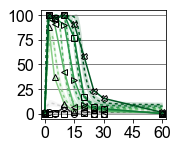

In [102]:
plotting.plt_param_cis(M2c_fxns, e4_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='test03')